In [3]:
BOOK = 'Books'
MT = 'Movies & TV'

def load_data_set(products_filename, reviews_filename): 
    product_cate = []
    txts = []
    ys = []
    
    for line in open(products_filename):
        newLine = (eval('(' + line + ')'))
        obj = {
            'asin': newLine.get('asin'),
            'title': newLine.get('title'),
            'description': newLine.get('description'),
            'category': list(newLine.get('salesRank').keys())[0]
        }
        product_cate.append(obj)
        
    for line in open(reviews_filename):
        newLine = (eval('(' + line + ')'))
        asin = newLine.get('asin')
        product = next(item for item in product_cate if item["asin"] == asin) 
        if product['category'] == BOOK:
            ys.append(0)
        elif product['category'] == MT:
            ys.append(1)
        else:
            ys.append(2)        
        title = product['title']
        des = product['description']
        if title is not None and len(title) > 0 and des is not None and len(des) > 0:
            txts.append(product['title'] + ' ' + product['description'] + ' ' + newLine.get('summary') + ' ' + newLine.get('reviewText'))
        elif title is not None and len(title) > 0:
            txts.append(product['title'] + ' ' + newLine.get('summary') + ' ' + newLine.get('reviewText'))
        elif des is not None and len(des) > 0:
            txts.append(product['description'] + ' ' + newLine.get('summary') + ' ' + newLine.get('reviewText'))
        else:
            txts.append(newLine.get('summary') + ' ' + newLine.get('reviewText'))
    return txts, ys

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import MultinomialNB

v = CountVectorizer(stop_words = 'english')
k = SelectKBest(mutual_info_classif, 500)

def build_model(product_file_name="products.txt", review_file_name="reviews.txt"):
    texts, y = load_data_set(product_file_name, review_file_name)
    b = MultinomialNB()
    X = v.fit_transform(texts)
    X = k.fit_transform(X, y)
    b.fit(X, y)
    return b

In [9]:
def prepare_data(product_file_name, review_file_name):
    X, y = load_data_set(product_file_name, review_file_name)
    X = v.transform(X)
    X = k.transform(X)
    return X, y

-----------------------------------------------------------------------------
### Documenting your Decisions


----------------------------
#### Model Quality

What do you expect the accuracy of your model to be on a new set of product records it has not seen before?
How many variables are in your model?

Answer: 
The cross validation of our training model is 0.8939, and we use the model on test sets, we get the accuracy score 0.8798. So our expectation is above 87%. We uses 500 variables.

| score    | products_test.txt & reviews_test.txt |
|----------|--------------------------------------|
| accuracy score | 0.8798 |

| score    | products.txt & reviews.txt |
|----------|--------------------------------------|
| cross validation | 0.8938 |


| K features       |  K features accuracy |
|------------------|----------------------|
| 100 | 0.8838|
| 500 | 0.8938|
| 900 | 0.8716|
|1300 | 0.8838|
|1700 | 0.8572|
|2100 | 0.8099|
|2500 | 0.7077|
|2900 | 0.6894|
|3300 | 0.6783|
|3700 | 0.7594|
|4000 | 0.8183|
|4500 | 0.8644|
|5000 | 0.8027|



------------------------------------------------
#### Input Fields

What input fields from the product and review records did you include in training your model?
How did you decide which fields to use and which to omit?

Answer: From our testing, we tested four different combinations of input fields: "summary, review", "summary, review, title", "summary, review, description" and " summary, review, title and description". We use three different algorithms to train the data, and test the confusion_matrix, accuracy_score and cross validation of them separately. From the output, we can get 0.7577 by using 'summary, review, title, description' as input fields, and train the data by using NaiveBayes.
Other fields, like 'related', 'imUrl', 'price', 'brand' in products.txt, 'reviewerID', 'reviewerName', 'helpful', 'reviewTime', 'overall', 'unixReviewTime' in reviews.txt, these fields don't seem to have any relationship with the catergory of the product.


|cross validation|Summary, review| Summary, review, title|Summary, review, description|Summary, review, title, description|
|----------------|---------------|-----------------------|----------------------------|-----------------------------------|
|Naive Bayes|0.6938|0.7288|0.7277|0.7577|
|Nearest centroid|0.4166|0.4477|0.4149|0.4066|
|Nearest neighbors(20)|0.3711|0.97|0.4283|0.4405|

-------------------------------------------
#### Preprocessing

What preprocessing steps did you use?  At minimum you must evaluate stemming, tokenizing, stop word removal.  How did you decide which steps improved the model and which did not?

Answer: We've tried SnowballStemmer('english', ignore_stopwords = True), stop words removal(English), bigram, RegexpTokenizer as tokenizer, used these strategies to preprocess the data and train the model. It turns out using stopwords give the best accuracy.


|cross/shape|nothing| stopwords r|stemming,tokenizing|ngram(1,2)|stopwords r, ngram|stopwords r, stemming and tokenizing|
|-----------|-------|------------|-------------------|----------|------------------|------------------------------------|
|X.shape|(99,5288)|(99,5039)|(99,4239)|(99,21294)|(99,15261)|(99,4239)|
|cross validation|0.7578|0.8028|0.7467|0.7678|0.6772|0.7467|


---------------------------------------------
#### Vectorization

What technique did you use to turn the input features into a feature vector?  How did you make that choice?

Answer: We first retrive raw data from the file, then vectorize it with countVectorizer, and Tfidf vectorizer seperately with default parameters, train it with MultinomialNB, and get the accuracy. Count Vectorizer works better. 


| count Vectorizer    | Tfidf Vectorizer |
|---------------------|------------------|
| 0.7578 | 0.6544 |

####  Feature Selection

What features did you use in the model, and how did you make that choice?

Answer: We use top 500 features with high mutual information because it gives better result on cross validation. 

List some of the most important features.  Are you convinced that they are are accurate exemplars of the class, or might they be artifacts of the training set?

Answer: Most important features for classifing Books: book, wesley, patients, mdash, university, walser, books.  
Most important features for classifing M&T: western, swing, fu, kung, ichigo, fighting.
Most important features for classifing Music: op, songs, piano, cd, album, string

Features like 'book', 'books', ' western', 'fu', 'kung', 'songs', 'piano', 'cd' absolutely make sense, but the others may be artifacts. And the top ranked words that not helping, seem to work very well for determing the product is not in one specific catogory.

List some of the least important features -- do they suggest ways to cut down the model size without significantly affecting accuracy? 

Answer: Most least import features are the words that not irrelavent. I think they can be taken away without affecting accuracy.

How different are the three measures, i.e. do they all tend to rank the same variables as significant and insignificant?  Which did you use in your model, and why?

Answer: We've tried Frequency-based selection, and Mutual information. The frequency-based selection ranked work by the term frequency, the mutual information ranked by probability, they are different. We use mutual information because it gives better result on cross validation.

|Frequency_based selection| min_df=0.01|min_df=0.02|min_df=0.03|min_df=0.04|
|-------------------------|------------|-----------|-----------|-----------|
|X.shape| (99,5039)|(99,1380)|(99,681)|(99,416)|
|Cross validation| 0.8027|0.8150|0.8433|0.8127|

| K features       |  K features accuracy |
|------------------|----------------------|
| 100 | 0.8838|
| 500 | 0.8938|
| 900 | 0.8716|
|1300 | 0.8838|
|1700 | 0.8572|
|2100 | 0.8099|
|2500 | 0.7077|
|2900 | 0.6894|
|3300 | 0.6783|
|3700 | 0.7594|
|4000 | 0.8183|
|4500 | 0.8644|
|5000 | 0.8027|


Important words help Books
1.755320458871047 book
1.489233086388045 wesley
1.4741822130579412 patients
1.4741822130579412 mdash
1.458425397404553 university
1.4418713381634052 walser
1.441596186487778 books
1.4244086249019319 generation
1.4058991687555542 rdquo
1.4058991687555542 ldquo
1.38616865539957 fundraising
1.38616865539957 anesthesia
1.3649922138612003 weather
1.3649922138612003 organization
1.3649922138612003 observatory
1.3649922138612003 native
1.3649922138612003 hattersley
1.3510416569416903 author
1.3420720562816966 wine

Important words not helping Books
0.6507014810468132 film
0.6727679517808396 op
0.676918013856461 set
0.685719797606114 songs
0.690399805735158 cd
0.6952878812739713 album
0.6952878812739713 jazz
0.6952878812739713 movie
0.7004033893514696 dvd
0.7173543520079977 song
0.730306197833272 played
0.7351092295073177 music
0.7374030855209323 heard
0.7449897895786277 piano
0.753138968485503 aacute
0.753138968485503 pieces
0.753138968485503 string
0.753138968485503 western
0.7619407522351559 2013
0.7619407522351559 band


Important words help M & T
1.421712021529612 western
1.3865586696310677 swing
1.3865586696310677 fu
1.3672704683573413 kung
1.3672704683573413 ichigo
1.3672704683573413 gundam
1.3672704683573413 fighting
1.3672704683573413 fight
1.346563387503235 wan
1.346563387503235 vhs
1.346563387503235 concert
1.3316767585299534 dvd
1.3241449758995982 zabar
1.3241449758995982 tv
1.3241449758995982 trouble
1.3241449758995982 superfighters
1.3241449758995982 run
1.3241449758995982 production
1.3241449758995982 poker
1.3241449758995982 opera


Important words not helping M & T
0.6220797525878042 book
0.6633124262791396 op
0.7204724815813678 wesley
0.7275227224303972 mdash
0.7275227224303972 patients
0.7275227224303972 radio
0.7350595601557657 piano
0.7350595601557657 university
0.7366040191598249 songs
0.7418577807109173 cd
0.743155175662715 aacute
0.743155175662715 pieces
0.743155175662715 string
0.743155175662715 walser
0.7473559894514451 album
0.7473559894514451 books
0.7473559894514451 major
0.7518991065331478 2013
0.7518991065331478 age
0.7518991065331478 generation

Important words help Music
1.6744011875596703 op
1.5095137629873188 songs
1.5006283076694762 piano
1.4980952342148146 cd
1.4863289623158638 album
1.4832589100160114 string
1.4832589100160114 pieces
1.4832589100160114 aacute
1.4649446372802326 2013
1.424870484375148 quartet
1.4026963501254954 shostakovich
1.4026963501254954 october
1.4026963501254954 dances
1.3910995091908311 radio
1.3910995091908311 heard
1.3787108199813156 supremes
1.3787108199813156 box
1.3524915348994058 violin
1.3524915348994058 quartets
1.3524915348994058 lovecraft

Important words not helping Music
0.570350429365658 book
0.7143129137257491 books
0.7366904550427615 read
0.7430644039861916 reading
0.7498248827716024 wesley
0.7570218151386768 author
0.7570218151386768 master
0.7570218151386768 mdash
0.7570218151386768 patients
0.764715468807056 information
0.764715468807056 little
0.764715468807056 university
0.764715468807056 writing
0.764715468807056 york
0.7729795265209674 body
0.7729795265209674 students
0.7729795265209674 walser
0.7729795265209674 western
0.78190538883467 generation
0.7836873761531932 new


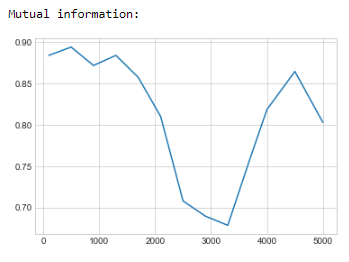

-------------------------------------------------
#### Algorithm

Which classification algorithm did you use;  what alternatives did you explore and how did you make the choice?  What hyperparameter optimization did you perform?

We tested three algorithm: Naive Bayes, Nearest centroid and KNN. We finally choose the Naive Bayes because the cross validation of it is the highest.
We do the hyperparameter optimization on KNN but the cross validation still very low.

|cross validation|Summary, review| Summary, review, title|Summary, review, description|Summary, review, title, description|
|----------------|---------------|-----------------------|----------------------------|-----------------------------------|
|Naive Bayes|0.6938|0.7288|0.7277|0.7577|
|Nearest centroid|0.4166|0.4477|0.4149|0.4066|
|Nearest neighbors(20)|0.3711|0.97|0.4283|0.4405|

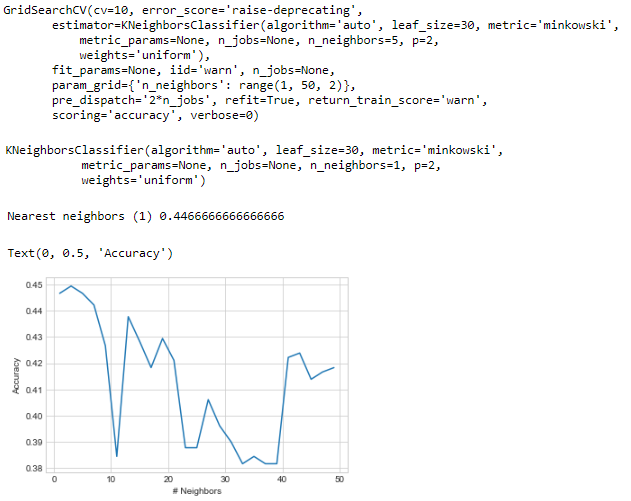


----------------------------------------
#### Understanding Misclassifications

Even though misclassifications are inevitable, it is important to understand *why* your algorithm makes errors, and whether it is making "understandable" errors.   Choose several examples of misclassification and informally explain why you believe the classifier made the wrong choice.  Is/was there anything you might be able to do in terms of feature engineering to fix some misclassifications?

Example 1:
Predicted category: Book
Actual category: Music
Details: {'asin': 'B0000258ZX’,'title': 'California Connection’, 'description': None, 'summary': 'A great connection’, 'review': 'Jan is a very versatile player, both as a soloist, and as a backup. Peter is a pleasant surprise. The U.S.     contingent mak the whole thing come to life. Very nice.’}

----Reason: The reviewer was focus on the music player, he talked so much about him, make the classifier misclassify it as a story, so that's why the classifier mark it as a "BOOK" category. 

Example 2:
Predicted category: Movies & TV
Actual category: Music
Details: {''asin': 'B00J4BOFRK’,'title': None,'description': None,'summary': 'Rio 2’,'review': 'Fantastic  music I cannot wait to see the movie and buy the DVD.Takes me away to Rio. Just close your eyes and your there.’}

-----Reason: The classifier marks it as a Movie & TV because of words "movie" and "DVD".

Example 3:
Predicted category: Book
Actual category: Movies & TV
Details: {'asin': 'B000WNGXAG’,'title': None,'description': 'Brand New & Factory Sealed. Fast shipping from the USA. Tracking included on all domestic orders. 100% satisfaction guaranteed.’,'summary': 'the best of antonio aguilar’,'review': 'this is a part of a trilogy,all of them are good and they are part of the history of mexico.’}

-----Reason: The classifier didn't recorgnize it is a movie and TV because there's no word to make it as a movie and TV. The reviewer mentioned "trilogy", "history" which could mislead classifier to mark it as a book.

Improvement: we could add the position to classifier so that we could get the right prediction base on previous or latter words.

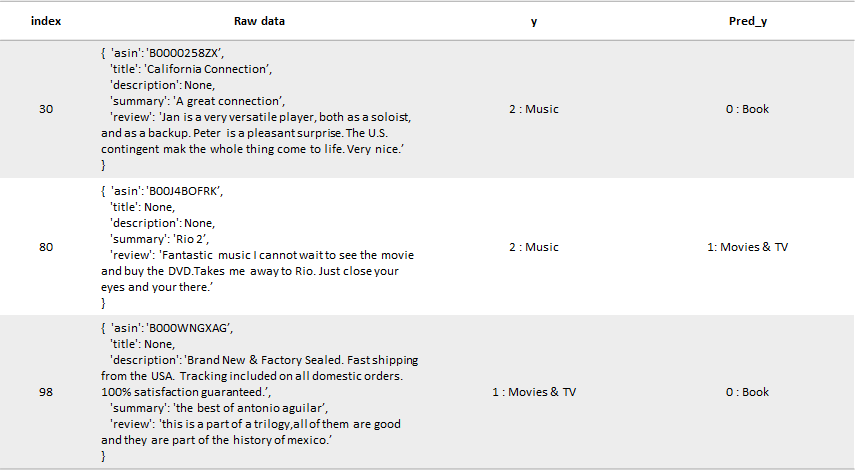